In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import pickle as pkl

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data=pkl.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data=pkl.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  val_data=pkl.load(f)



In [0]:
type(train_data)

dict

In [0]:
x_train,y_train=train_data['features'],train_data['labels']
x_test,y_test=test_data['features'],test_data['labels']
x_val,y_val=val_data['features'],val_data['labels']


In [0]:
type(x_train)

numpy.ndarray

In [0]:
x_train.shape

(34799, 32, 32, 3)

In [0]:
x_test.shape

(12630, 32, 32, 3)

In [0]:
x_val.shape

(4410, 32, 32, 3)

In [0]:
y_train.shape

(34799,)

In [0]:
y_test.shape

(12630,)

In [0]:
train_data.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [0]:
data=pd.read_csv('german-traffic-signs/signnames.csv')

In [0]:
data['SignName'].count()


43

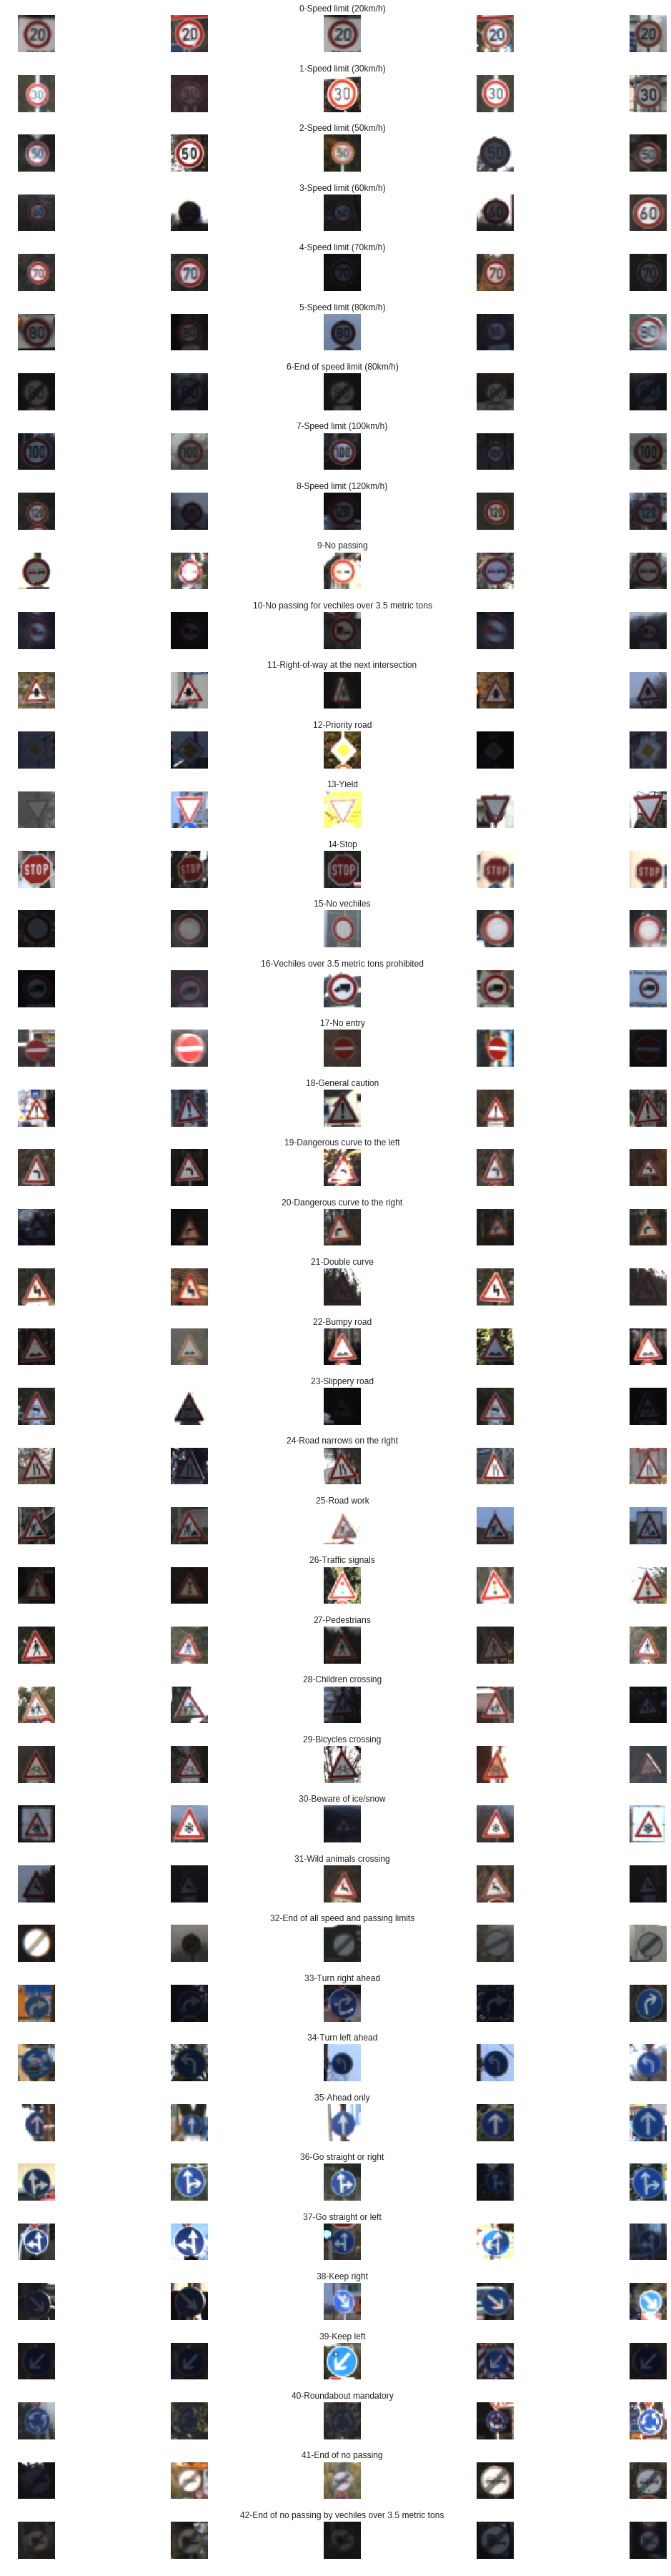

In [0]:
num_of_sample=[]

cols=5
num_classes=43
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(15,50))
fig.tight_layout()

for i in range(cols):
  for j,raw in data.iterrows():
    x_selected=x_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    
    if i==2:
      axs[j][i].set_title(str(j)+'-'+raw['SignName'])
      num_of_sample.append(len(x_selected))

In [0]:
num_of_sample

[180,
 1980,
 2010,
 1260,
 1770,
 1650,
 360,
 1290,
 1260,
 1320,
 1800,
 1170,
 1890,
 1920,
 690,
 540,
 360,
 990,
 1080,
 180,
 300,
 270,
 330,
 450,
 240,
 1350,
 540,
 210,
 480,
 240,
 390,
 690,
 210,
 599,
 360,
 1080,
 330,
 180,
 1860,
 270,
 300,
 210,
 210]

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


([<matplotlib.axis.XTick at 0x7f74aad75c50>,
 <a list of 43 Text xticklabel objects>)

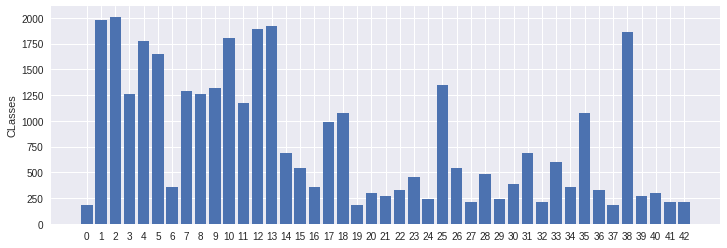

In [0]:
print(num_of_sample)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_sample)
plt.ylabel("CLasses")
plt.xticks(np.arange(0,43))


In [0]:
import cv2
def grayscale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

(32, 32, 3)
36


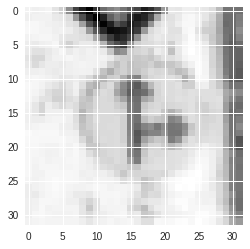

In [0]:
img=grayscale(x_train[1000])
plt.imshow(img)
print(x_train[1000].shape)
print(y_train[1000])
#to check our image is converted to greysacle or not

In [0]:
def equalize(img):
  img=cv2.equalizeHist(img)
  return img

In [0]:
def preprocess(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img

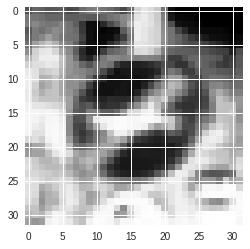

In [0]:
plt.imshow(preprocess(x_train[100]))

In [0]:
x_train[1].shape

(32, 32, 3)

In [0]:
x_train=np.array(list(map(preprocess,x_train)))
x_test=np.array(list(map(preprocess,x_test)))
x_val=np.array(list(map(preprocess,x_val)))


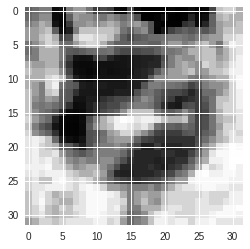

In [0]:
plt.imshow(x_train[200])

In [0]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)

In [0]:
x_val.shape

(4410, 32, 32)

In [0]:
x_train=x_train.reshape(34799,32,32,1)

In [0]:
x_test=x_test.reshape(12630,32,32,1)

In [0]:
x_val=x_val.reshape(4410,32,32,1)

In [0]:
def le_net():
  model=Sequential()
  model.add(Conv2D(30,(5,5),input_shape = (32,32,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.2))
  #model.add(Dropout(0.3))#if you plot graph and you see that your accuracy or loss is not upto that mark then change dropout
  model.add(Dense(43,activation='softmax')) #num_classes =43 it means jo result aayega vo 0-9 ke beech mein aayega . agar result mein yes or no aata to hum num_classes ko 2 kar dete
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy']) # lr = learning rate
  return model
  

In [0]:
lenet =le_net()

In [0]:
lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               270500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [0]:
history=lenet.fit(x_train,y_train,epochs=10,batch_size=400,verbose=1,shuffle=1,validation_data=(x_val,y_val))

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 6s 164us/step - loss: 2.4423 - acc: 0.3656 - val_loss: 1.1954 - val_acc: 0.6685
Epoch 2/10
34799/34799 [==============================] - 2s 44us/step - loss: 0.7253 - acc: 0.7846 - val_loss: 0.6041 - val_acc: 0.8084
Epoch 3/10
34799/34799 [==============================] - 2s 44us/step - loss: 0.3854 - acc: 0.8866 - val_loss: 0.4648 - val_acc: 0.8510
Epoch 4/10
34799/34799 [==============================] - 2s 45us/step - loss: 0.2564 - acc: 0.9271 - val_loss: 0.3586 - val_acc: 0.8866
Epoch 5/10
34799/34799 [==============================] - 2s 45us/step - loss: 0.1875 - acc: 0.9474 - val_loss: 0.3073 - val_acc: 0.9063
Epoch 6/10
34799/34799 [==============================] - 2s 44us/step - loss: 0.1434 - acc: 0.9605 - val_loss: 0.3085 - val_acc: 0.9088
Epoch 7/10
34799/34799 [==============================] - 2s 44us/step - loss: 0.1142 - acc: 0.9684 - val_loss: 0.3064 - val_acc

Text(0.5, 0, 'epoch')

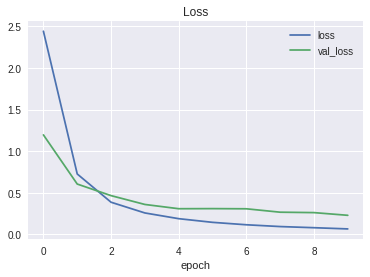

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
#blue line should not go beyond green line and blue line should be above green line if this is not the case then overfitting problem is there

Text(0.5, 0, 'epoch')

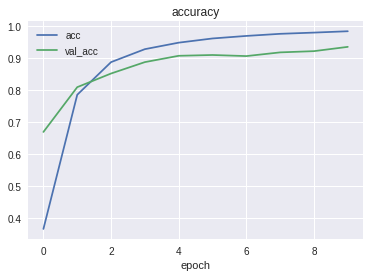

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('accuracy')
plt.xlabel('epoch')
#green line should be above blue line 


In [0]:
import requests
from PIL import Image

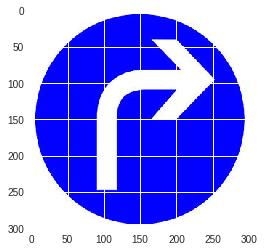

In [0]:
url="https://i.ebayimg.com/images/g/8u4AAMXQlgtS9Ko7/s-l300.jpg"
response=requests.get(url,stream=True)
img=Image.open(response.raw)
plt.imshow(img)

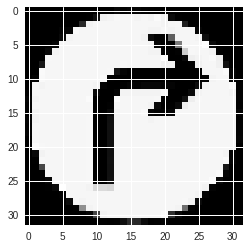

In [0]:
import cv2
img_array=np.asarray(img)
res=cv2.resize(img_array,(32,32))
gray=cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
image=cv2.bitwise_not(gray)
plt.imshow(image,cmap=plt.get_cmap('gray'))

In [0]:
#image=image/255
image=image.reshape(1,32,32,1)
str(lenet.predict_classes(image))


'[38]'